In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

- pie chart : 카테고리별 값의 상대적인 비교

In [12]:
labels = ['뽕사부', '순대국밥', '개구리비빔밥', '생고기', '치하철버거']
datas = [15, 15, 20, 25, 25]
colors = ['gold', 'blue', 'red', 'yellow', 'green']

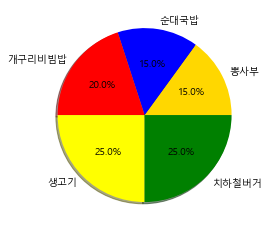

In [17]:
plt.figure()

plt.pie(datas, labels = labels, colors=colors, shadow=True, autopct='%1.1f%%')

plt.show()
plt.close()

In [19]:
pieDF = pd.read_csv('./data/auto-mpg.csv', header=None)
pieDF.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

In [21]:
pieDF['cnt'] = 1

In [22]:
pieDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [68]:
originDF = pieDF.groupby('origin').sum()
originDF

,mpg,cylinders,displacement,weight,acceleration,model year,cnt
origin,,,,,,,
1,5000.8,1556,61229.5,837121.0,3743.4,18827,249
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [69]:
originDF.index = ['USA', 'EU', 'KOR']
originDF.index

Index(['USA', 'EU', 'KOR'], dtype='object')

In [70]:
originDF.columns

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'cnt'],
      dtype='object')

In [71]:
originDF

,mpg,cylinders,displacement,weight,acceleration,model year,cnt
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
KOR,2405.6,324,8114.0,175477.0,1277.6,6118,79


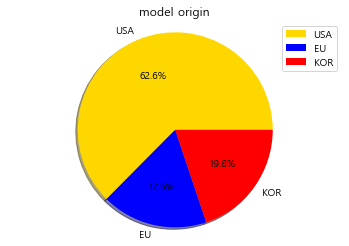

In [72]:
plt.figure()

# originDF['cnt'].plot(kind='pie', autopct='%1.1f%%', colors = ['gold', 'blue', 'red'], shadow=True)

plt.pie(originDF['cnt'], labels = originDF.index, colors=colors, shadow=True, autopct='%1.1f%%')

plt.title ('model origin')
plt.legend (labels = originDF.index, loc = 'best')

plt. axis('equal')

plt.show()
plt.close()

In [57]:
cylindersDF = pieDF.groupby('cylinders').sum()
cylindersDF

,mpg,displacement,weight,acceleration,model year,origin,cnt
cylinders,,,,,,,
3,82.2,290.0,9594.0,53.0,302,12,4
4,5974.5,22398.5,470858.0,3386.7,15723,405,204
5,82.1,435.0,9310.0,55.9,237,6,3
6,1678.8,18324.0,268651.0,1366.1,6378,100,84
8,1541.2,35536.0,423816.0,1334.4,7612,103,103


In [73]:
cylindersDF.index = ['cy3', 'cy4', 'cy5', 'cy6', 'cy8']
cylindersDF.index

Index(['cy3', 'cy4', 'cy5', 'cy6', 'cy8'], dtype='object')

In [74]:
cylindersDF

,mpg,displacement,weight,acceleration,model year,origin,cnt
cy3,82.2,290.0,9594.0,53.0,302,12,4
cy4,5974.5,22398.5,470858.0,3386.7,15723,405,204
cy5,82.1,435.0,9310.0,55.9,237,6,3
cy6,1678.8,18324.0,268651.0,1366.1,6378,100,84
cy8,1541.2,35536.0,423816.0,1334.4,7612,103,103


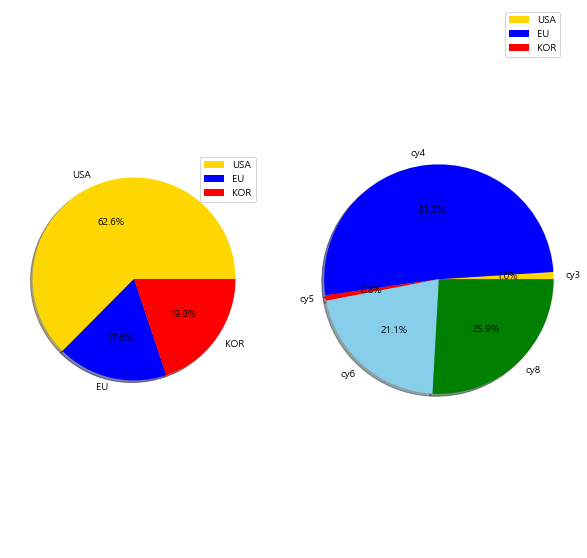

In [75]:
fig = plt.figure(figsize=(10,10))

ax01 = fig.add_subplot(1,2,1)
ax02 = fig.add_subplot(1,2,2)

# originDF['cnt'].plot(kind='pie', autopct='%1.1f%%', colors = ['gold', 'blue', 'red'], shadow=True)

ax01.pie (originDF['cnt'].values, labels = originDF.index, colors=colors, shadow=True, autopct='%1.1f%%')
ax02.pie (cylindersDF['cnt'].values, labels = cylindersDF.index, colors=['gold','blue','red','skyblue','green'], shadow=True, autopct='%1.1f%%')


ax01.legend(labels = originDF.index, loc = 'best')
ax02.legend(labels = originDF.index, loc = 'best')

plt. axis('equal')

plt.show()
plt.close()

- histogram : 특정한 구간에 대한 데이터 집계
- 변수가 하나인 단변수 데이터의 빈도 수 시각화 하고자 할때 

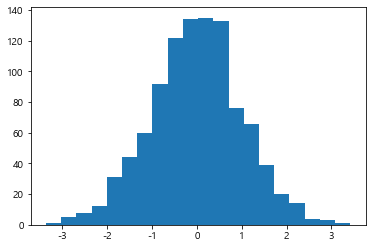

In [82]:
datas = np.random.randn(1000)
datas

plt.figure()

plt.hist(datas, bins = 20)


plt.show()
plt.close()

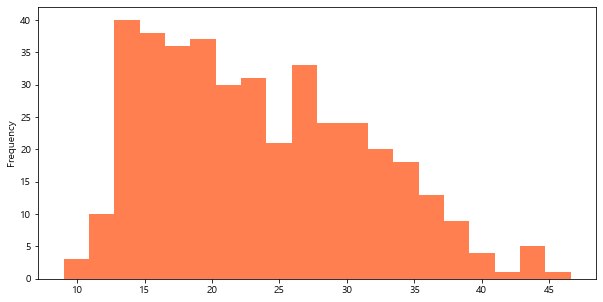

In [90]:
plt.figure()

pieDF['mpg'].plot(kind='hist', bins=20, color='coral', figsize=(10,5))

plt.show()
plt.close()

### koweps_visualization.xlsx [실습]

In [99]:
rowDF = pd.read_excel('./data/koweps_visualization.xlsx')
rowDF

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


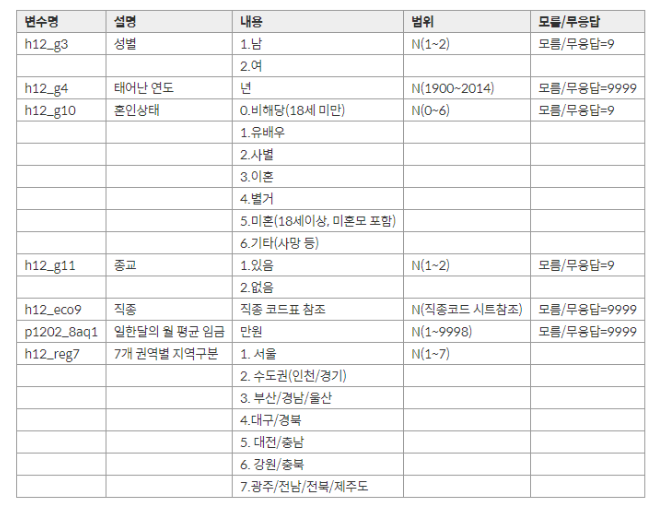

In [308]:
from IPython.display import Image
Image('c:/numpy_img/koweps_img.png', width = 700)

In [120]:
# 문제 1 
subsetDF = rowDF[['h12_g3', 'h12_g4', 'h12_g10', 'h12_g11', 'h12_eco9', 'p1202_8aq1', 'h12_reg7']] 
subsetDF.columns = ['성별', '태어난 연도', '혼인상태', '종교', '직종', '일한달의 월 평균 임금', '7개 권역별 지역구분']
subsetDF

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


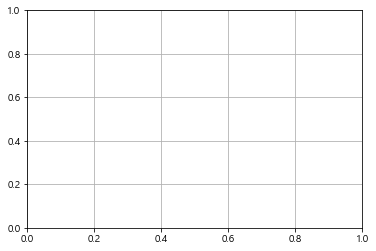

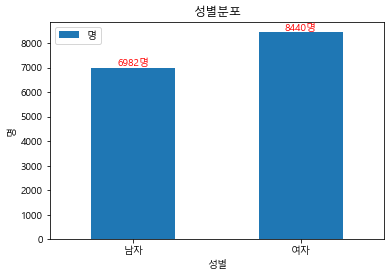

In [137]:
# 데이터 분석 (조사 대상자들에 대한 성별 분포)

# 1. 성별의 데이터 분포 확인

#display (subsetDF.filter(['성별']))

genderDF = subsetDF.filter(['성별'])

genderDF['성별2'] = np.where(subsetDF.filter(['성별']) == 1 , '남자', '여자')
genderDF

# 결측값 확인
# genderDF, isna().sum()

gender_cnt_df = pd.DataFrame(genderDF['성별2'].value_counts())
gender_cnt_df

# 컬럼이름 변경 rename()

gender_cnt_df.rename(columns={'성별2' : '명'}, inplace = True)
gender_cnt_df


2. # 성별을 비율순으로 정렬
gender_cnt_df.sort_values('명', ascending = True, inplace = True)
gender_cnt_df

# 데이터 시각화

plt.figure()
plt.grid()

gender_cnt_df.plot.bar(rot= 0)

plt.title ('성별분포')
plt.xlabel ('성별')
plt.ylabel ('명')

for idx , value in enumerate(list(gender_cnt_df['명'])) :
    txt = '%d명' % value
    plt.text(idx , value , txt , 
             horizontalalignment = 'center' , 
             verticalalignment = 'bottom' ,
             color = 'red')

plt.show()
plt.close()

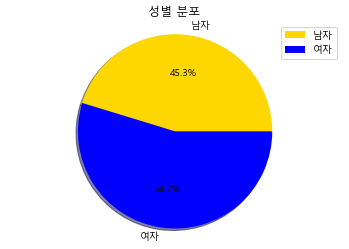

In [142]:
# pie char로 만들어 보자

plt.figure()

plt.pie(gender_cnt_df['명'],
        labels = gender_cnt_df.index,
        colors=colors, shadow=True,
        autopct='%1.1f%%')

plt.title ('성별 분포')
plt.legend (labels = gender_cnt_df.index, loc = 'best')

plt.show()
plt.close()

### 문제2
### 성별에 따른 평균 급여 차이를 분석
- 성별과 월급 데이터만 추출
- 성별을 남자와 여자 변경
- 데이터 정제(결측값 확인, 제거)
- 데이터 분석(성별로 그룹화 그룹별 평균)
- 데이터 시각화

In [170]:
sexDF = subsetDF[['태어난 연도','일한달의 월 평균 임금']]
sexDF

,태어난 연도,일한달의 월 평균 임금
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


In [168]:
# 성별과 월급 데이터만 추출
gender_salary_df = subsetDF.filter(['성별', '일한달의 월 평균 임금'])
# gender_salary_df.head()

# 성별을 남자와 여자로 변환
gender_salary_df['성별'] = np.where(gender_salary_df['성별'] == 1 , '남자' , '여자')
# gender_salary_df.head()

# 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
print(gender_salary_df.isna().sum())
gender_salary_df.dropna(inplace = True)
print("*" * 50)
print(gender_salary_df.isna().sum())

# 이상치 결측 처리
# 급여 범위를 벗어나면  / nan 대체하고  / 결측치 처리 ~
gender_salary_df['일한달의 월 평균 임금'] = np.where(
    ((gender_salary_df['일한달의 월 평균 임금'] < 1) | ( gender_salary_df['일한달의 월 평균 임금'] > 9998)) ,
    np.nan,
    gender_salary_df['일한달의 월 평균 임금'] )
gender_salary_df

# 데이터 분석(성별로 그룹화하여 그룹별 평균)
gender_salary_mean_df = gender_salary_df.groupby('성별').mean()
gender_salary_mean_df.head()


성별                  0
일한달의 월 평균 임금    10915
dtype: int64
**************************************************
성별              0
일한달의 월 평균 임금    0
dtype: int64


,일한달의 월 평균 임금
성별,
남자,333.422185
여자,176.359967


### 문제 3

- 나이에 따른 평균 급여 변화

- 데이터 전처리(태어난 년도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가)
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(나이별 따른 급여평균)
- 데이터 시각화


In [220]:
age_salary_df = subsetDF.filter(['태어난 연도', '일한달의 월 평균 임금'])

age_salary_df['나이'] = 2021 - age_salary_df['태어난 연도']

age_salary_df

,태어난 연도,일한달의 월 평균 임금,나이
0,1936,NaN,85
1,1945,NaN,76
2,1948,NaN,73
3,1942,108.9,79
4,1923,NaN,98
...,...,...,...
15417,1967,NaN,54
15418,1992,NaN,29
15419,1995,72.0,26
15420,1998,NaN,23


In [221]:
print(age_salary_df.isna().sum())
age_salary_df.dropna(inplace = True)
print("*" * 50)
print(age_salary_df.isna().sum())
age_salary_df

태어난 연도              0
일한달의 월 평균 임금    10915
나이                  0
dtype: int64
**************************************************
태어난 연도          0
일한달의 월 평균 임금    0
나이              0
dtype: int64


,태어난 연도,일한달의 월 평균 임금,나이
3,1942,108.9,79
10,1940,20.0,81
16,1978,322.0,43
17,1975,120.0,46
24,1975,300.0,46
...,...,...,...
15400,1966,230.0,55
15401,1962,138.0,59
15404,1993,286.0,28
15412,1956,179.0,65


In [227]:
age_salary_df['연령대']= (age_salary_df['나이']//10)*10
age_salary_df

KeyError: '나이'

In [226]:
del age_salary_df ['나이']

In [228]:
age_salary_df

,태어난 연도,일한달의 월 평균 임금,연령대
3,1942,108.9,70
10,1940,20.0,80
16,1978,322.0,40
17,1975,120.0,40
24,1975,300.0,40
...,...,...,...
15400,1966,230.0,50
15401,1962,138.0,50
15404,1993,286.0,20
15412,1956,179.0,60


In [216]:
age_salary_df = age_salary_df.groupby('나이').mean()
age_salary_df['일한달의 월 평균 임금']

나이
20    154.890476
30    245.701425
40    328.371147
50    314.173167
60    226.846086
70     94.149102
80     35.000000
90     22.000000
Name: 일한달의 월 평균 임금, dtype: float64

### 문제4
- 연령대에 따른 분포
- 연령대별 평균 급여 변화
- 성별과 연령대 분포
- 성별과 연령대에 따른 평균 급여 변화
- 지역별 연령층 분포와 연령층별 지역 비율


In [234]:
gender_year_df = subsetDF.filter(['성별','태어난 연도'])

gender_year_df['성별'] = np.where(gender_year_df['성별'] == 1 , '남자' , '여자')
gender_year_df

,성별,태어난 연도
0,여자,1936
1,여자,1945
2,남자,1948
3,남자,1942
4,여자,1923
...,...,...
15417,여자,1967
15418,여자,1992
15419,남자,1995
15420,여자,1998


In [235]:
# 연령대 계산

import datetime as t

gender_year_df['연령대'] = (t.datetime.now().year - gender_year_df['태어난 연도']+1) //10 * 10
gender_year_df

,성별,태어난 연도,연령대
0,여자,1936,80
1,여자,1945,70
2,남자,1948,70
3,남자,1942,80
4,여자,1923,90
...,...,...,...
15417,여자,1967,50
15418,여자,1992,30
15419,남자,1995,20
15420,여자,1998,20


### 이상치 정제

In [268]:
xls = pd.ExcelFile('./data/car_mpg.xlsx')
dataDF = xls.parse(xls.sheet_names[0])
dataDF

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [289]:
dataDF.shape

(234, 12)

In [290]:
dataDF.describe()

,Unnamed: 0,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,117.500000,3.471795,2003.500000,5.888889,16.858974,23.440171
std,67.694165,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.000000,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,59.250000,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,117.500000,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,175.750000,4.600000,2008.000000,8.000000,19.000000,27.000000
max,234.000000,7.000000,2008.000000,8.000000,35.000000,44.000000


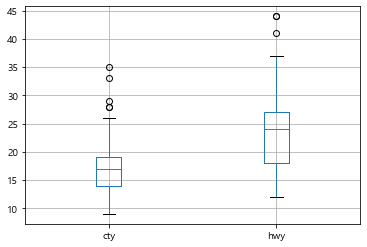

In [311]:
outlierDF = dataDF.filter(['cty','hwy'])

plt.figure()

outlierDF.boxplot()

plt.show()
plt.close()


In [292]:
# 분위수의 정보를 얻고자 한다면?
quantile75 = outlierDF.quantile(q=0.75)
quantile75

cty    19.0
hwy    27.0
Name: 0.75, dtype: float64

In [293]:
quantile25 = outlierDF.quantile(q=0.25)
quantile25

cty    14.0
hwy    18.0
Name: 0.25, dtype: float64

In [294]:
# IQR (InterQuertile range)
# Median
iqr= quantile75 - quantile25
iqr

cty    5.0
hwy    9.0
dtype: float64

In [295]:
# lower fence (최저 한계치)
# upper fence (최고 한계치)

lower_fence = quantile25 - 1.5 * iqr
print ('lower_fence :', lower_fence)

upper_fence = quantile75 + 1.5 * iqr
print ('upper_fence :', upper_fence)

lower_fence : cty    6.5
hwy    4.5
dtype: float64
upper_fence : cty    26.5
hwy    40.5
dtype: float64


In [310]:
# 극단치 경계 값을 (아래 수평선)
lower_outlier = outlierDF [ outlierDF > lower_fence].min()
print ('lower_outlier :', lower_outlier)

# 극단치 경계 값을 (위 수평선)
upper_outlier = outlierDF [ outlierDF > upper_fence].max()
print ('upper_outlier :', upper_outlier)

lower_outlier : cty     9
hwy    12
dtype: int64
upper_outlier : cty    35.0
hwy    44.0
dtype: float64


In [309]:
# hwy 연비의 이상치 데이터 추출
hwy_outlier_df = dataDF.query( 'hwy > ' + str(upper_outlier['hwy']))
display( hwy_outlier_df )


cty_outlier_df = dataDF.query( 'cty  > '  + str(upper_outlier['cty']))
display( cty_outlier_df )



,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class


In [302]:
#cty_outlier_clean_df = cty_outlier_df.copy()
outlier_clean_df = dataDF.copy()

# 도시 연비에 대한 이상치를 결측값으로 변경

for idx in cty_outlier_df.index :
    outlier_clean_df.loc[idx,'cty'] = np.nan
outlier_clean_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [287]:
# hwy_outlier_clean_df = hwy_outlier_df.copy()



# 도시 연비에 대한 이상치를 결측값으로 변경

for idx in hwy_outlier_df.index :
    hwy_outlier_clean_df.loc[idx,'hwy'] = np.nan
hwy_outlier_clean_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class


In [300]:
#cty_outlier_clean_df = cty_outlier_df.copy()
outlier_clean_df = dataDF.copy()

# 도시 연비에 대한 이상치를 결측값으로 변경

for idx in cty_outlier_df.index :
    outlier_clean_df.loc[idx,'hwy'] = np.nan
outlier_clean_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [301]:
outlier_clean_df.filter(['cty','hwy']).isna().sum()

cty    0
hwy    0
dtype: int64

In [304]:
# 제거
resultDF = outlier_clean_df.filter(['drv', 'cty','hwy']).dropna().groupby('drv').mean()
resultDF 

,cty,hwy
drv,,
4,14.330097,19.174757
f,19.971698,28.160377
r,14.080000,21.000000


<Figure size 432x288 with 0 Axes>

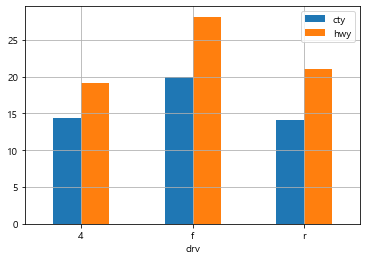

In [305]:
plt.figure()

resultDF.plot.bar(rot=0)
plt.grid()

plt.show()
plt.close()

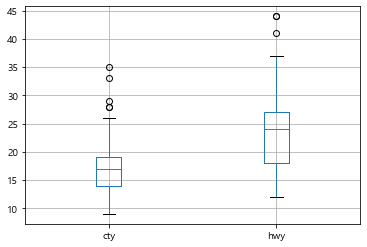

In [307]:
outlier_clean_df.filter(['cty','hwy']).boxplot()
plt.show()